# Исследование надежности заемщиков.

## Введение

Заказчик — кредитный отдел банка.

Задача — выяснить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Предоставлены входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут использоваться при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<b>План по выполнению проекта</b>

1. Загрузка данных
2. Предобработка и подготовка данных
    * Найти столбцы с аномальными значения и обработать их
    * Найти и обработать пропущенные значения
    * Проверить правильность типов данных
    * Найти строки дубликаты, удалить их и обработать неявные дубликаты
    * Создайть два новых датафрейма, в которых:
        * каждому уникальному значению из education соответствует уникальное значение education_id — в первом;
        * каждому уникальному значению из family_status соответствует уникальное значение family_status_id — во втором.
    * Удалить из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id.
    * На основании диапазонов, указанных ниже, создать столбец total_income_category с категориями:
        * 0–30000 — 'E'
        * 30001–50000 — 'D'
        * 50001–200000 — 'C'
        * 200001–1000000 — 'B'
        * 1000001 и выше — 'A'
    * Создать функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
        * 'операции с автомобилем'
        * 'операции с недвижимостью'
        * 'проведение свадьбы'
        * 'получение образования'

3. Ответы на вопросы

    * Есть ли зависимость между количеством детей и возвратом кредита в срок?
    * Есть ли зависимость между семейным положением и возвратом кредита в срок?
    * Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    * Как разные цели кредита влияют на его возврат в срок?

4. Вывод

## 1. Обзор данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option("display.max_columns", None)

plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [4]:
df_original = df.copy()

In [5]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639,покупка жилья
1,1,-4024.804,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014,приобретение автомобиля
2,0,-5623.423,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952,покупка жилья
3,3,-4124.747,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550,дополнительное образование
4,0,340266.072,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078,сыграть свадьбу


<b>Описание столбцов данных</b>
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

## 2. Обработка данных

Получим общую информацию о датасете.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

В названиях столбцов ошибок и опечаток нет.

In [8]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Посмотрим соотношение пропущенных значений в столбцах.

In [9]:
plot_isna = df.isna().mean().sort_values(ascending=False) * 100
plot_isna = plot_isna[plot_isna > 0]

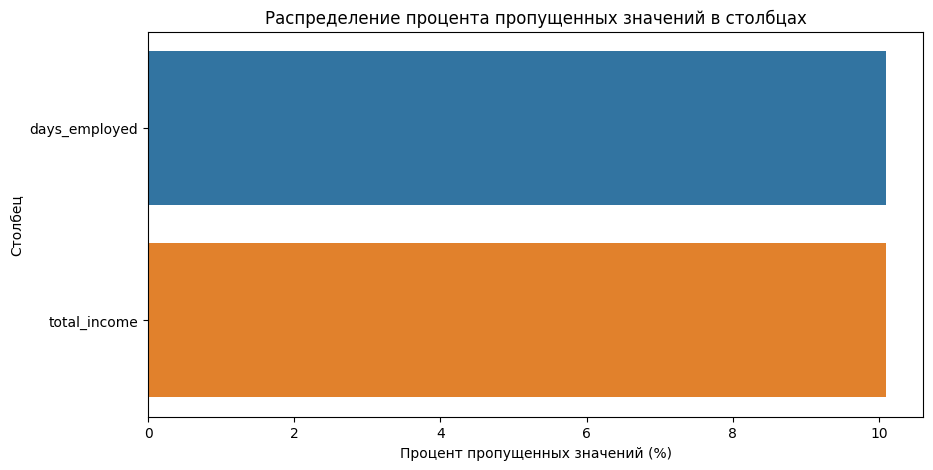

In [10]:
sns.barplot(x=plot_isna, y=plot_isna.index).set(title=('Распределение процента пропущенных значений в столбцах'),
                                                xlabel='Процент пропущенных значений (%)',
                                                ylabel='Столбец')

plt.show()

В столбцах 'days_employed' и 'total__income' есть пропущенные значения.

### 2.1 Проверка данных на аномалии и исправления.

Проверим столбцы на аномальные данные.

In [11]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639,покупка жилья
1,1,-4024.804,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014,приобретение автомобиля
2,0,-5623.423,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952,покупка жилья
3,3,-4124.747,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550,дополнительное образование
4,0,340266.072,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078,сыграть свадьбу


**Столбец 'children'.**

In [12]:
counted_values_children = df['children'].value_counts().sort_index()
print(counted_values_children)

-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64


In [13]:
perc_children_print_1 = counted_values_children[-1] / len(df['children'])
perc_children_print_2 = counted_values_children[20] / len(df['children'])
print(f'Процент значений -1 в столбце \'children\': {perc_children_print_1:.3%}')
print(f'Процент значений 20 в столбце \'children\': {perc_children_print_2:.3%}')

Процент значений -1 в столбце 'children': 0.218%
Процент значений 20 в столбце 'children': 0.353%


Можно заметить, что выделяются значения -1 и 20. Теоретически 20 детей возможный случай, но такое большое количество строк (больше чем 4 и 5 вместе) очень маловероятно. Количество строк с аномальными значениями небольшое по отношению к общему числу строк.

В реальности можно попытаться выяснить с чем связаны эти ошибки заполнения и какое должно быть значение. Можно предположить, что -1 = 1, 20 = 2 (как наиболее возможные опечатки), либо 20 это маркер для пропущенных значений. Так как количество таких значений небольшое удалим их из датасета.

In [14]:
df = df.drop(df[df['children'].isin([-1, 20])].index)

print(df['children'].value_counts())

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


**Столбец 'days_employed'.**

In [15]:
print(df['days_employed'].dropna().sort_values(ascending=False).head())
print(df['days_employed'].dropna().sort_values(ascending=False).tail())

6954    401755.400
10006   401715.812
7664    401675.093
2156    401674.467
7794    401663.850
Name: days_employed, dtype: float64
16825   -16119.688
17838   -16264.700
7329    -16593.473
4299    -17615.563
16335   -18388.950
Name: days_employed, dtype: float64


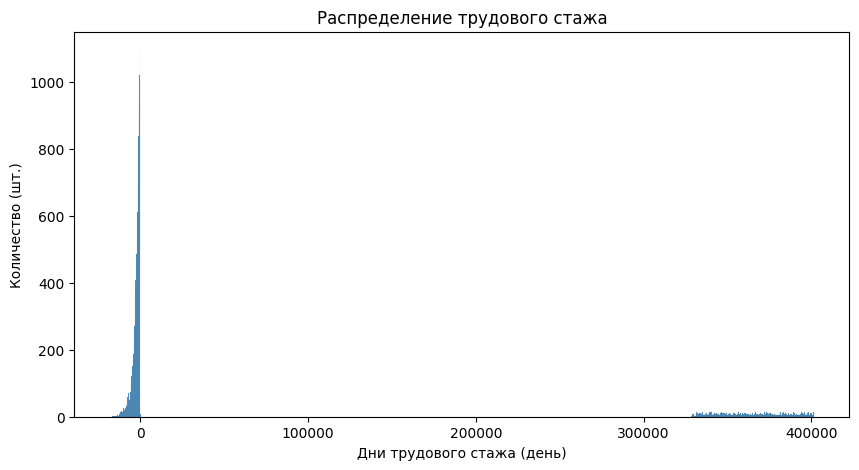

In [16]:
sns.histplot(df['days_employed']).set(title=('Распределение трудового стажа'),
                                      xlabel='Дни трудового стажа (день)',
                                      ylabel='Количество (шт.)')

plt.show()

Можно заметить, большое количество отрицательных значений, и также некоторое количество теоретически невозможных значений (трудовой стаж превышающий 100 лет).

Исправим отрицательные значения на положительные. Непонятна природа аномально высоких значений: это могут быть например часы или пропуски, которые по какой-то причине трансформировались в аномальные значения для этого признака.

In [17]:
df['days_employed'] = df['days_employed'].abs()

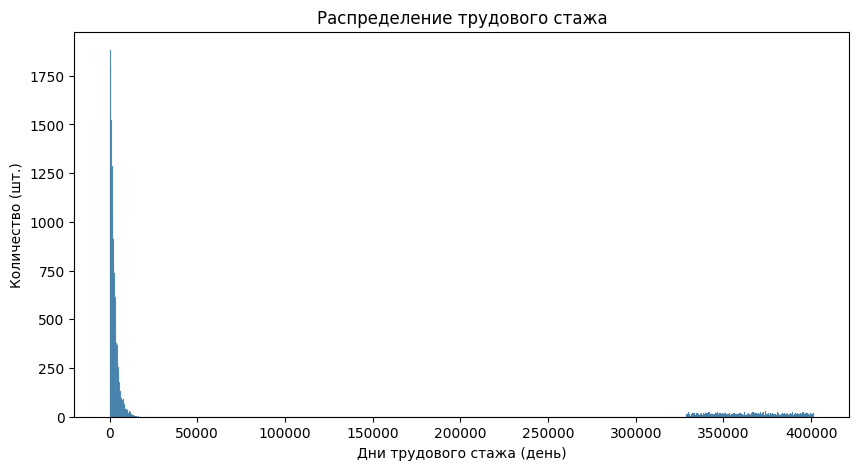

In [18]:
sns.histplot(df['days_employed']).set(title=('Распределение трудового стажа'),
                                      xlabel='Дни трудового стажа (день)',
                                      ylabel='Количество (шт.)')

plt.show()

Посмотрим количество и процентальное отношение аномально высоких значений. Поставим отсечку в 50 лет, как максимально возможный трудовой стаж.

In [19]:
print('Количество аномальных значений:', df[df['days_employed'] > 50 * 365]['days_employed'].count())

perc_d_employed_anom = (df[df['days_employed'] > 50 * 365]['days_employed'].count() / df['days_employed'].count())
print(f'Процент аномальных значений в столбце \'days_employed\': {perc_d_employed_anom:.3%}')

Количество аномальных значений: 3432
Процент аномальных значений в столбце 'days_employed': 17.838%


Большое количество аномальных значений, не убдем их удалять, так как в этих строках может содержаться ценные данные по другим признакам.

Гистограмма не очень хорошо отображается из-за аномально высоких значений. Отфильтруем их и построим новую.

In [20]:
days_employed_filt = df[df['days_employed'] < 50 * 365]['days_employed']

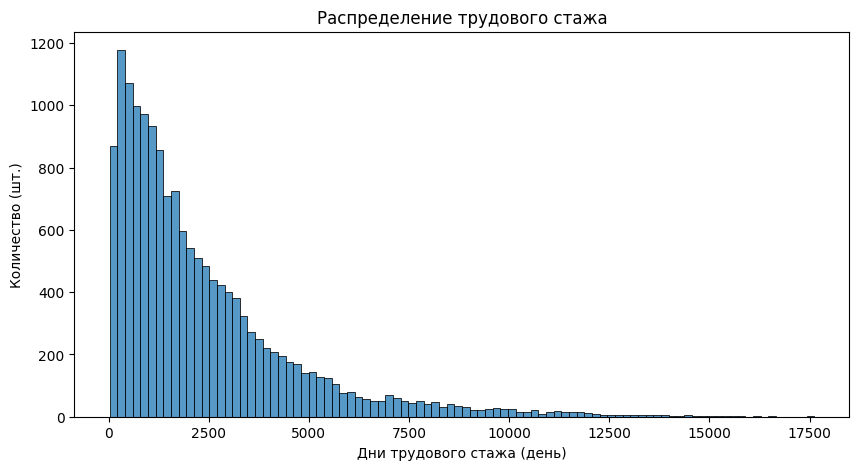

In [21]:
sns.histplot(days_employed_filt).set(title=('Распределение трудового стажа'),
                                     xlabel='Дни трудового стажа (день)',
                                     ylabel='Количество (шт.)')

plt.show()

Как видно по гистограмме, количество людей немного возрастает от 0 дней трудового стажа, а затем начинает постепенно снижаться с возрастанием трудового стажа.

Столбец 'dob_years'.

In [22]:
counted_values_d_years = df['dob_years'].value_counts().sort_index()
print(counted_values_d_years.head())
print(counted_values_d_years.tail())

0     100
19     14
20     51
21    110
22    183
Name: dob_years, dtype: int64
71    58
72    33
73     8
74     6
75     1
Name: dob_years, dtype: int64


In [23]:
perc_d_years_print = counted_values_d_years[0] / len(df['dob_years'])
print(f'Процент значений 0 в столбце \'dob_years\': {perc_d_years_print:.3%}')

Процент значений 0 в столбце 'dob_years': 0.467%


Из аномальных значений можно выделить только 0 лет. Процент строк со значением 0 к общему количеству строк маленький. Удалим эти строки.

In [24]:
df = df.drop(df[df['dob_years'] == 0].index)

print(df['dob_years'].value_counts().sort_index().head())

19     14
20     51
21    110
22    183
23    252
Name: dob_years, dtype: int64


**Столбец 'education' и 'education_id'.**

In [25]:
df['education'].value_counts()

среднее                13609
высшее                  4666
СРЕДНЕЕ                  764
Среднее                  700
неоконченное высшее      663
ВЫСШЕЕ                   270
Высшее                   266
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Категориальная переменная, аномальных значений нет, есть неявные дубликаты. Поправим их в дальнейшем.

In [26]:
df['education_id'].value_counts().sort_index()

0     5202
1    15073
2      739
3      282
4        6
Name: education_id, dtype: int64

Категориальная переменная, аномальных значений нет. Столбцы 'education' и 'education_id' связаны. Столбец 'education' и его связь с 'education_id' стоит вынести в отдельный датасет.

**Столбцы 'family_status' и 'family_status_id'.**

In [27]:
df['family_status'].value_counts()

женат / замужем          12254
гражданский брак          4139
Не женат / не замужем     2783
в разводе                 1179
вдовец / вдова             947
Name: family_status, dtype: int64

Категориальная переменная, аномальных значений нет, есть заглавные буквы. Поправим.

In [28]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].value_counts()

женат / замужем          12254
гражданский брак          4139
не женат / не замужем     2783
в разводе                 1179
вдовец / вдова             947
Name: family_status, dtype: int64

Законодательно "гражданский брак" - это обычный брак зарегистрированный в государственных органах и таким образом он является неявным дубликатом "женат / замужем". Возможно имеется ввиду, то что обывательски подразумевается под гражданским браком - сожительство. Можно было бы запрость у отвественных за заполнение, что имелось ввиду. Примем вариант, что имеется ввиду сожительство.

In [29]:
df['family_status_id'].value_counts().sort_index()

0    12254
1     4139
2      947
3     1179
4     2783
Name: family_status_id, dtype: int64

Категориальная переменная, аномальных значений нет. Столбцы 'family_status' и 'family_status_id' связаны. Столбец 'family_status' и его связь с 'family_status_id' стоит вынести в отдельный датасет.

**Столбец 'gender'.**

In [30]:
df['gender'].value_counts()

F      14083
M       7218
XNA        1
Name: gender, dtype: int64

Категориальная переменная, аномальное значение одно - XNA. В предоставленных данных не указано какие значениям может принимать данный столбец и что может значить XNA (нежелание указывать, небинарного человека и т.п.). Удалим это значение.

In [31]:
df = df.drop(df[df['gender'] == 'XNA'].index)

In [32]:
df['gender'].value_counts()

F    14083
M     7218
Name: gender, dtype: int64

**Столбец 'income_type'.**

In [33]:
df['income_type'].value_counts()

сотрудник          10996
компаньон           5033
пенсионер           3819
госслужащий         1447
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Категориальная переменная, аномальных значений нет.

**Столбец 'debt'.**

In [34]:
df['debt'].value_counts()

0    19577
1     1724
Name: debt, dtype: int64

Категориальная переменная, аномальных значений нет.

**Столбец 'total_income'.**

In [35]:
print(df['total_income'].dropna().sort_values(ascending=False).head())
print(df['total_income'].dropna().sort_values(ascending=False).tail())

12412   2265604.029
19606   2200852.210
9169    1726276.014
20809   1715018.393
17178   1711309.268
Name: total_income, dtype: float64
14276   21895.614
1598    21695.102
16174   21367.648
13006   21205.281
14585   20667.264
Name: total_income, dtype: float64


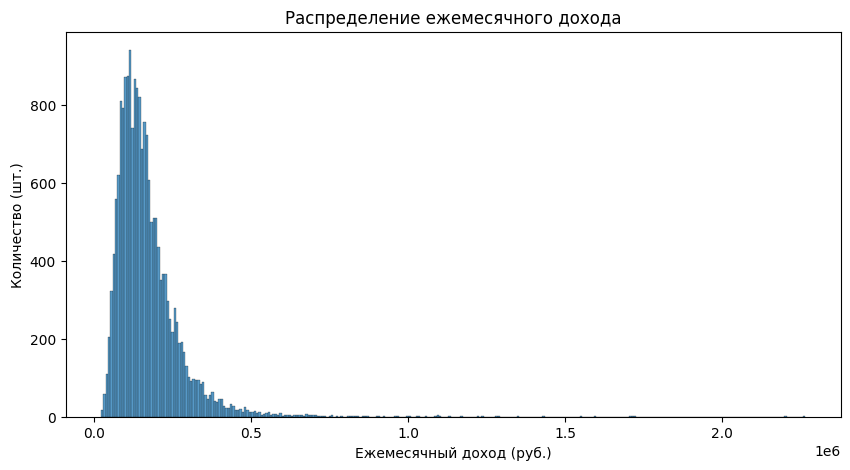

In [36]:
sns.histplot(df['total_income']).set(title=('Распределение ежемесячного дохода'),
                                     xlabel='Ежемесячный доход (руб.)',
                                     ylabel='Количество (шт.)')

plt.show()

Аномальных значений нет.

**Столбец 'purpose'.**

In [37]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           764
операции с недвижимостью                  670
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   649
операции с коммерческой недвижимостью     644
операции с жильем                         642
покупка жилья для семьи                   639
жилье                                     636
покупка жилья                             635
недвижимость                              628
операции со своей недвижимостью           626
строительство собственной недвижимости    626
строительство недвижимости                620
строительство жилой недвижимости          619
покупка своего жилья                      618
покупка недвижимости                      615
ремонт жилью                              607
покупка жилой недвижимости                600
на покупку своего автомобиля              501
заняться высшим образованием      

Категориальная переменная, аномальных значений нет, есть схожие цели кредитов, для группировки нужен либо столбец с суммами кредитов, либо столбец с категориями кредитов (как 'education_id' и 'family_status_id'). "ремонт жилью" переименуем в "ремонт жилья".


In [38]:
df['purpose'] = df['purpose'].replace('ремонт жилью', 'ремонт жилья')

In [39]:
print((df['purpose'] == 'ремонт жилью').sum())
print((df['purpose'] == 'ремонт жилья').sum())

0
607


### 2.2 Заполнение пропусков

Подсчитаем пропуски.

In [40]:
df.isna().sum()

children               0
days_employed       2152
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2152
purpose                0
dtype: int64

Значения пропущены в столбцах показывающих общий трудовой стаж в днях ('days_employed') и ежемесячный доход ('total_income').

Подсчитаем процент пропущенных значений в столбцах 'days_employed' и 'total_income', так как количество пропусков одинаковое, считаем только для одного столбца.

In [41]:
perc_d_employed_print  = df['days_employed'].isna().sum() / len(df)

print(f'Процент пропусков в days_employed: {perc_d_employed_print:.1%}')
print(f'Процент пропусков в total_income: {perc_d_employed_print:.1%}')

Процент пропусков в days_employed: 10.1%
Процент пропусков в total_income: 10.1%


**Рассмотрим столбец 'days_employed'.**

In [42]:
print(df['days_employed'].dropna().sort_values(ascending=False).head())
print(df['days_employed'].dropna().sort_values(ascending=False).tail())

6954    401755.400
10006   401715.812
7664    401675.093
2156    401674.467
7794    401663.850
Name: days_employed, dtype: float64
2127    34.701
9683    33.521
6157    30.195
8336    24.241
17437   24.142
Name: days_employed, dtype: float64


В столбце 'days_employed' присутствуют аномально высокие значения. Отфильтруем их для подсчета медианы и заполнения пропусков (смотри пункт 2.1). Используем медиану, как более устойчивую к выбросам.



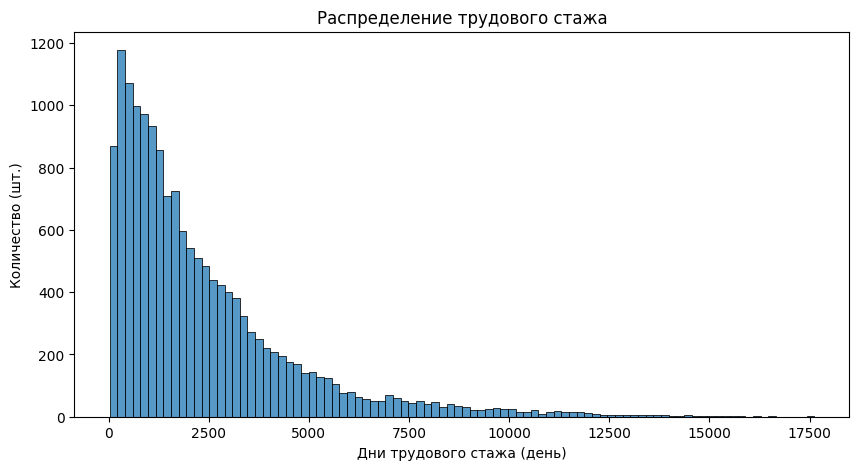

In [43]:
sns.histplot(days_employed_filt).set(title=('Распределение трудового стажа'),
                                     xlabel='Дни трудового стажа (день)',
                                     ylabel='Количество (шт.)')

plt.show()

In [44]:
days_employed_filt_median = days_employed_filt.median()
days_employed_filt_median

1630.3945349007106

In [45]:
df['days_employed'] = df['days_employed'].fillna(days_employed_filt_median)
df['days_employed'].isna().sum()

0

**Рассмотрим столбец 'total_income'.**

In [46]:
print(df['total_income'].dropna().sort_values(ascending=False).head())
print(df['total_income'].dropna().sort_values(ascending=False).tail())

12412   2265604.029
19606   2200852.210
9169    1726276.014
20809   1715018.393
17178   1711309.268
Name: total_income, dtype: float64
14276   21895.614
1598    21695.102
16174   21367.648
13006   21205.281
14585   20667.264
Name: total_income, dtype: float64


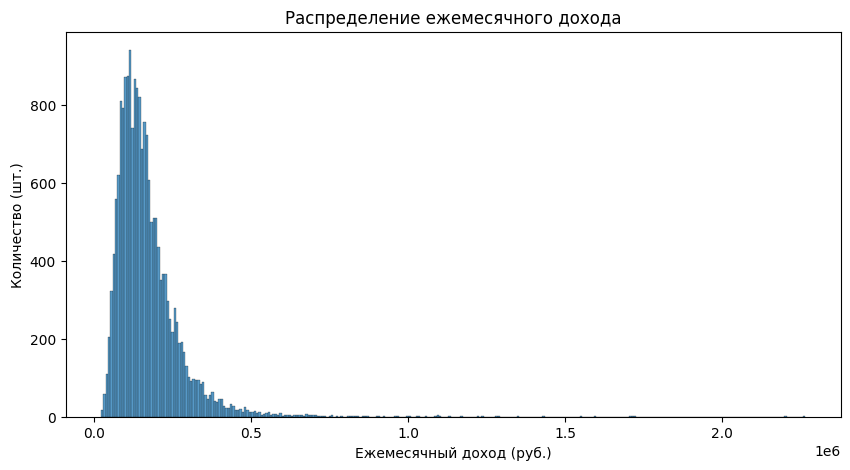

In [47]:
sns.histplot(df['total_income']).set(title=('Распределение ежемесячного дохода'),
                                     xlabel='Ежемесячный доход (руб.)',
                                     ylabel='Количество (шт.)')

plt.show()

Заполним пропуски медианой в 'total_income' там присутствуют несколько очень высоких значений заработной платы, среднее исказит данные.

In [48]:
print(df['total_income'].mean())
df['total_income'].median()

167491.8688048186


145017.93753253992

In [49]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median())
df['total_income'].isna().sum()

0

### 2.3 Изменение типов данных.

В столбцe 'total_income', данные представлены как вещественные числа. Для удобства заменим на целочисленные (дробная часть пренебрежительно мала по сравнению с целочисленной).

In [50]:
df['total_income'] = df['total_income'].astype('int64')
df['total_income'].sort_values()

14585      20667
13006      21205
16174      21367
1598       21695
14276      21895
          ...   
17178    1711309
20809    1715018
9169     1726276
19606    2200852
12412    2265604
Name: total_income, Length: 21301, dtype: int64

### 2.4 Удаление дубликатов.

Так как не представлены уникальные номера клиентов, проверка на полные дубликаты не совсем корректна, могут быть люди у которых совпадут все значения строк. Для целей исследования предположим, что такие полные совпадения маловероятны. Проверку на полные дубликаты проведем после замены неявных дубликатов в конкретных столбцах.

Неявные дубликаты присутствуют в столбце 'education' (см. пункт 2.1).

**Столбец 'education'.**

In [51]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Согласно 'education_id', у нас есть 5 категорий образования, примем их как:

1.   'начальное'
2.   'среднее'
3.   'неоконченное высшее'
4.   'высшее'
5.   'ученая степень'



Можем заметить, что разница в значениях только заглавные буквы. Применим метод lower(), предварительно обратившись к строке внутри Series.

In [52]:
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

В данном случае неочевидные дубликаты скорее всего появились в результате внесения текстовых данных в базу оператором.

**Обработаем явные дубликаты.**

In [53]:
df.duplicated().sum()

71

In [54]:
df = df.drop_duplicates(ignore_index=True)
df.duplicated().sum()

0

### 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Столбцы 'education' и 'education_id', а также для 'family_status' и 'family_status_id' связаны, и столбцы со строковыми значениями не нужны в исходном датафрейме. Переработаем датафрейм.

Создадим датафреймы словарей для 'education' и 'education_id', а также для 'family_status' и 'family_status_id'.

In [55]:
education_dict = df[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True).sort_values('education_id')
education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [56]:
family_status_dict = df[['family_status_id', 'family_status']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True).sort_values('family_status_id')
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Удалим столбцы 'education' и 'family_status'.

In [57]:
df = df.drop(['education', 'family_status'], axis=1)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.804,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.423,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### 2.6. Категоризация дохода.

Создадим категории для ежемясячного дохода клиентов и вынесем их в отдельный столбец.

Категории:

* 0–30000 — 'E'
* 30001–50000 — 'D'
* 50001–200000 — 'C'
* 200001–1000000 — 'B'
* 1000001 и выше — 'A'

Напишем функцию которую применим к столбцу 'total_income'

In [58]:
def income_cat(income):
    '''
    Функция возвращает категорию дохода в зависимости от ежемесячного дохода.
    В случае ошибки данных функция возвращается np.NaN, для удобства проверки.
    '''
    if 0 <= income <= 30000:
        return('E')
    elif 30000 < income <= 50000:
        return('D')
    elif 50000 < income <= 200000:
        return('C')
    elif 200000 < income <= 1000000:
        return('B')
    elif income > 1000000:
        return('A')
    else: return(np.NaN)

In [59]:
df.insert(9, 'total_income_category', df['total_income'].apply(income_cat))
df['total_income_category'].isna().sum()

0

In [60]:
df['total_income_category'].unique()

array(['B', 'C', 'D', 'E', 'A'], dtype=object)

In [61]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,total_income_category,purpose
0,1,8437.673,42,0,0,F,сотрудник,0,253875,B,покупка жилья
1,1,4024.804,36,1,0,F,сотрудник,0,112080,C,приобретение автомобиля
2,0,5623.423,33,1,0,M,сотрудник,0,145885,C,покупка жилья
3,3,4124.747,32,1,0,M,сотрудник,0,267628,B,дополнительное образование
4,0,340266.072,53,1,1,F,пенсионер,0,158616,C,сыграть свадьбу


### 2.7. Категоризация целей кредита.

Рассмотрим уникальные значения в столбце 'purpose'.

In [62]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Примем как основные категории:
* 'операции с автомобилем'
* 'операции с недвижимостью'
* 'проведение свадьбы'
* 'получение образования'

Создадим функцию и применим её к столбу 'purpose'.

In [63]:
def purpose_cat(category):
    '''
    Функция возвращает категорию цели кредита в зависимости от цели кредита,
    проверяя наличие ключевых слов в str.
    '''
    if 'авто' in category:
        return('операции с автомобилем')
    elif 'жил' in category or 'недвиж' in category:
        return('операции с недвижимостью')
    elif 'свад' in category:
        return('проведение свадьбы')
    elif 'образ' in category:
        return('получение образования')
    else: return(np.NaN)

In [64]:
df['purpose_category'] = df['purpose'].apply(purpose_cat)
df['purpose_category'].isna().sum()

0

In [65]:
df['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [66]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,total_income_category,purpose,purpose_category
0,1,8437.673,42,0,0,F,сотрудник,0,253875,B,покупка жилья,операции с недвижимостью
1,1,4024.804,36,1,0,F,сотрудник,0,112080,C,приобретение автомобиля,операции с автомобилем
2,0,5623.423,33,1,0,M,сотрудник,0,145885,C,покупка жилья,операции с недвижимостью
3,3,4124.747,32,1,0,M,сотрудник,0,267628,B,дополнительное образование,получение образования
4,0,340266.072,53,1,1,F,пенсионер,0,158616,C,сыграть свадьбу,проведение свадьбы


### Вывод

Проведена обработка данных:
1. Данные проверены на аномалии и исправлены.
2. Заполнены пропуски в столбцах 'days_employed' и 'total_income'.
3. Изменены тип данных в 'total_income' на int.
4. Удалены дубликаты.
5. Сформированы и выделены дополнительные датафреймы для 'education' и 'family_status', данные столбца удалены из основного датафрейма.
6. Выполнена категоризация дохода и целей кредита.

## Ответы на вопросы.

### Вопрос 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок?

Построим сводную таблицу.

In [67]:
def my_mean(x):
    '''
    Функция считает среднее и переводит доли в проценты
    '''
    return x.mean() * 100

In [68]:
plot_q1 = df.groupby('children')['debt'].agg(['count', my_mean]).reset_index()
plot_q1

,children,count,my_mean
0,0,14021,7.546
1,1,4792,9.203
2,2,2039,9.514
3,3,328,8.232
4,4,41,9.756
5,5,9,0.000


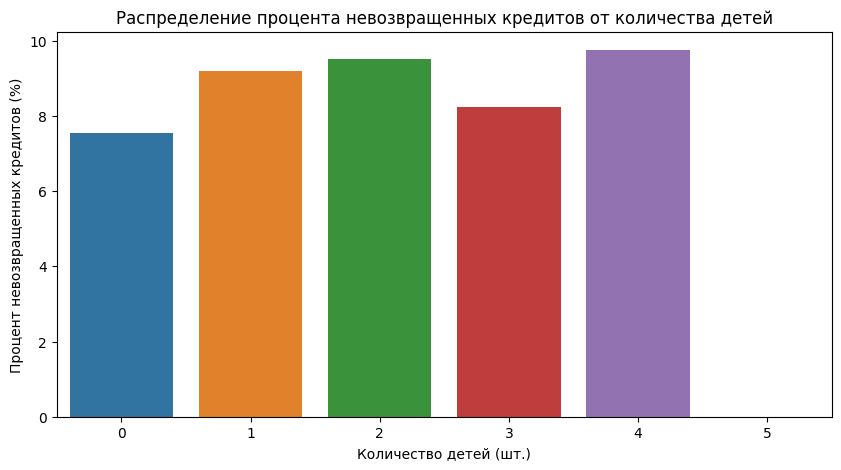

In [69]:
sns.barplot(data=plot_q1, x='children', y='my_mean').set(title=('Распределение процента невозвращенных кредитов от количества детей'),
                                                         xlabel='Количество детей (шт.)',
                                                         ylabel='Процент невозвращенных кредитов (%)')

plt.show()

#### Вывод 1:

Как видно из таблицы и графика с увеличением количества детей растет шанс невозврата кредита в срок, до 3 детей. Для 4 и 5 детей слишком маленькая выборка, чтобы сделать какие-то выводы.

### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?

Построим сводную таблицу.

In [70]:
plot_q2 = df.groupby('family_status_id')['debt'].agg(['count', my_mean])

plot_q2 = family_status_dict.merge(plot_q2, on='family_status_id').sort_values('my_mean').reset_index(drop=True)

plot_q2

,family_status_id,family_status,count,my_mean
0,2,вдовец / вдова,946,6.554
1,3,в разводе,1179,7.125
2,0,женат / замужем,12213,7.558
3,1,гражданский брак,4112,9.314
4,4,не женат / не замужем,2780,9.784


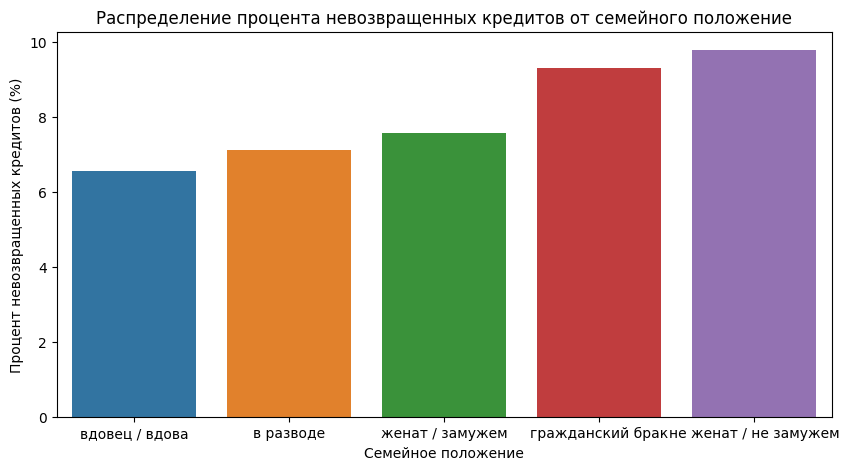

In [71]:
sns.barplot(data=plot_q2, x='family_status', y='my_mean').set(title=('Распределение процента невозвращенных кредитов от семейного положение'),
                                                              xlabel='Семейное положение',
                                                              ylabel='Процент невозвращенных кредитов (%)')

plt.show()

#### Вывод 2:

Вдовцы/вдовы и люди в разводе чаще всех возвращают кредиты в срок. Люди в гражданском браке и не женатые/незамужем делают это реже (на 2-3%).

### Вопрос 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Построим сводную таблицу.

In [72]:
plot_q3 = df.groupby('total_income_category')['debt'].agg(['count', my_mean]).reset_index()

plot_q3

,total_income_category,count,my_mean
0,A,25,8.000
1,B,4986,7.080
2,C,15850,8.492
3,D,347,6.052
4,E,22,9.091


Категории:

* 0–30000 — 'E'
* 30001–50000 — 'D'
* 50001–200000 — 'C'
* 200001–1000000 — 'B'
* 1000001 и выше — 'A'

Не будем рассматривать категории A и E из-за малого количества записей.

Категория D выделяется среди категорий B, C, D низким процентом возвратов кредитов в срок. Проверим не связно ли это с тем, что люди в категории D берут кредиты на другие цели.

In [73]:
for cat in ['B', 'C', 'D']:
    print('Категория:', cat)
    print(df[df['total_income_category'] == cat]['purpose_category'].value_counts(normalize=True))
    print('')

Категория: B
операции с недвижимостью   0.510
операции с автомобилем     0.204
получение образования      0.177
проведение свадьбы         0.109
Name: purpose_category, dtype: float64

Категория: C
операции с недвижимостью   0.503
операции с автомобилем     0.200
получение образования      0.189
проведение свадьбы         0.108
Name: purpose_category, dtype: float64

Категория: D
операции с недвижимостью   0.481
получение образования      0.216
операции с автомобилем     0.205
проведение свадьбы         0.098
Name: purpose_category, dtype: float64



Значительной разницы в целях кредитов для группа B, C и D почти нет.

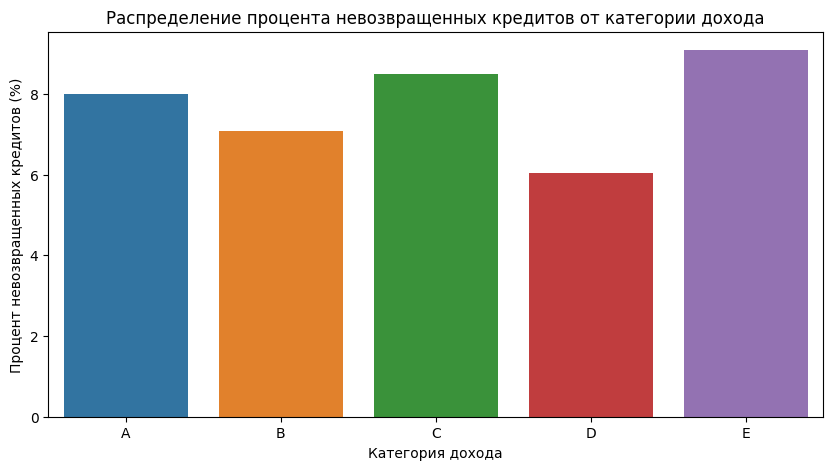

In [74]:
sns.barplot(data=plot_q3, x='total_income_category', y='my_mean').set(title=('Распределение процента невозвращенных кредитов от категории дохода'),
                                                                      xlabel='Категория дохода',
                                                                      ylabel='Процент невозвращенных кредитов (%)')

plt.show()

#### Вывод 3:

Видно, что категория B возвращает кредиты в срок чаще категории C, что коррелирует с разницей доходов. Стоит отметить, что когда мы заполняли пропуски медианой, медиана ~145000 попадает в категорию С, что могло исказить результаты. При этом категория D возвращает кредиты в срок чащё любых других категорий, это может быть связано, с тем что 330 человек недостаточное количество для сравнения.

### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?


Построим сводную таблицу.

In [75]:
plot_q4 = df.groupby('purpose_category', as_index=False)['debt'].agg(['count', my_mean]).sort_values('my_mean').reset_index()

plot_q4

,purpose_category,count,my_mean
0,операции с недвижимостью,10703,7.260
1,проведение свадьбы,2299,7.873
2,получение образования,3970,9.295
3,операции с автомобилем,4258,9.324


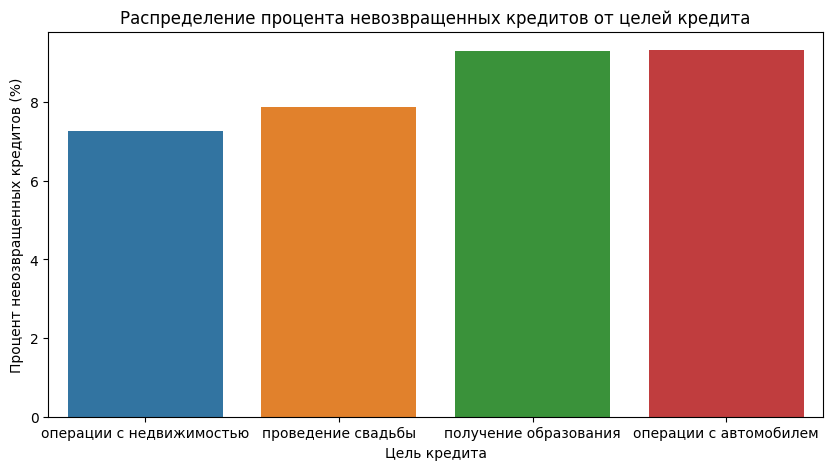

In [76]:
sns.barplot(data=plot_q4, x='purpose_category', y='my_mean').set(title=('Распределение процента невозвращенных кредитов от целей кредита'),
                                                                 xlabel='Цель кредита',
                                                                 ylabel='Процент невозвращенных кредитов (%)')

plt.show()

### Вывод 4:

Видна явная зависимость между целями кредитования и вероятностью возврата кредита в срок. Кредиты на операции с недвижимостью чаще всего возвращают в срок, кредиты на операции с автомобилем реже всего.

## Общий вывод:

* С ростом количества детей падает вероятность возврата кредита в срок, за исключением категории "3 ребенка".
    * Процент невозврата категории "0 детей" - 7.55%
    * Процент невозврата категории "4 ребенка" - 9.76%
* Вдовцы/вдовы с большей вероятностью возвращают кредиты в срок, неженатые/незамужем с меньшей вероятностью это делают.
    * Процент невозврата категории "вдовец / вдова" - 6.55%
    * Процент невозврата категории "не женат / не замужем" - 9.78%
* Зависимость для вероятности возврата кредита в срок от уровня заработный платы не такая явная, в нескольких категориях слишком мало людей для анализа. Также пустые значения заполнены медианой по столбцу, что могло исказить результаты.
    * Процент невозврата категории "D" - 6.05%
    * Процент невозврата категории "B" - 7.08%
    * Процент невозврата категории "С" - 8.49%    
* Вероятность возврата кредита в срок максимальна для кредитов на операции с недвижимостью и минимальна для кредитов на операции с автомобилем.
    * Процент невозврата категории "операции с недвижимостью" - 7.26%
    * Процент невозврата категории "операции с автомобилем" - 9.32%
* Из исследованных зависимостей сильнее всего на вероятность возврата кредита в срок влияют семейное положение и цель кредита.
